# 1 Equalização de histograma

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np # as imagens são lidas como numpy arrays
from matplotlib import pyplot as plt # é preciso chamar os submódulos
import matplotlib as mpl
from skimage import io,img_as_float, img_as_ubyte, img_as_uint, exposure
from skimage.exposure import histogram
import math

mpl.rcParams['font.size'] = 8

In [ ]:
print("*********************************************************************");
print('****        Código criado pelo Prof. Dr. Thiago Statella         ****');
print('****        Disciplina: Processamento Digital de Imagens         ****');
print('****  Instituto Federal de Educação, Ciência e Tecnologia de MT  ****');
print('*********************************************************************');

Definindo algumas funções:

In [ ]:
def data_info(img):
    print(f"Classe: {type(img)}")
    print(f"Tipo de variável: {img.dtype}")
    print(f"Min, max: {img.min(),img.max()}")
    print(f"Dimensões: {img.shape}")

In [ ]:
def hist_acu(hist):
    cdf = np.cumsum(hist)
    return cdf

In [123]:
#leitura das imagens
ref_img = io.imread('pout.tif')#imagem de referência
img1    = io.imread('cameraman.tif')#imagem a ser modificada
data_info(ref_img)
data_info(img1)

Classe: <class 'numpy.ndarray'>
Tipo de variável: uint8
Min, max: (74, 224)
Dimensões: (291, 240)
Classe: <class 'numpy.ndarray'>
Tipo de variável: uint8
Min, max: (7, 253)
Dimensões: (256, 256)


## 1.1 Equalização

In [124]:
img_eq = exposure.equalize_hist(ref_img)
img_eq = img_as_ubyte(img_eq)
data_info(img_eq)

Classe: <class 'numpy.ndarray'>
Tipo de variável: uint8
Min, max: (0, 255)
Dimensões: (291, 240)


Calculando os histogramas

In [125]:
#Cálculo dos histogramas
hist_ref_img, hist_centers_ref_img = histogram(ref_img,source_range='dtype')
#cdf_ref, bins_ref                  = exposure.cumulative_distribution(ref_img)
hist_img1, hist_centers_img1         = histogram(img_eq,source_range='dtype')
#cdf, bins                          = exposure.cumulative_distribution(img)

Exibindo os resultados

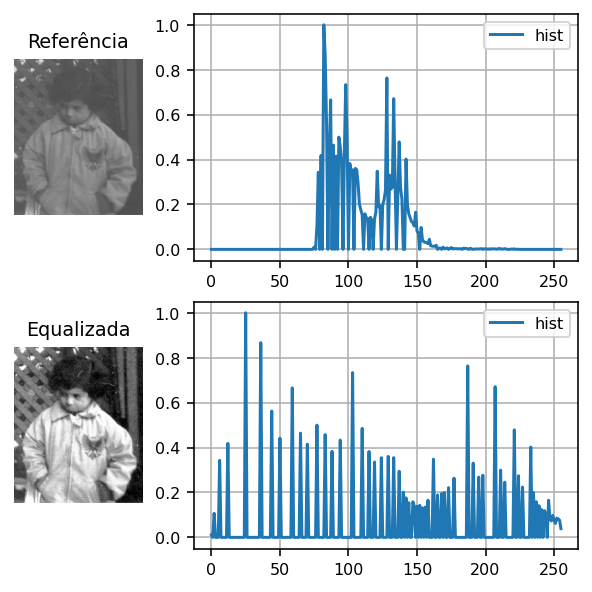

In [126]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(4, 4),
                        gridspec_kw={'width_ratios':[1,3]},
                        constrained_layout=True); 
ax[0,0].imshow(ref_img, vmin=0, vmax=255, cmap='gray')
ax[0,0].set_title("Referência") 
ax[0,0].axis('off')
ax[0,1].plot(hist_centers_ref_img, hist_ref_img / hist_ref_img.max(),label='hist')
ax[0,1].grid()
ax[0,1].legend()

ax[1,0].imshow(img_eq, vmin=0, vmax=255, cmap='gray')
ax[1,0].set_title("Equalizada") 
ax[1,0].axis('off')
ax[1,1].plot(hist_centers_img1, hist_img1 / hist_img1.max(),label='hist')
ax[1,1].grid()
ax[1,1].legend(); 

# 2 Registro de Histograma

In [127]:
#Cálculo dos histogramas

hist_ref_img, hist_centers_ref_img = histogram(ref_img,source_range='dtype')
#cdf_ref, bins_ref                  = exposure.cumulative_distribution(ref_img)
hist_img, hist_centers_img         = histogram(img,source_range='dtype')
#cdf, bins                          = exposure.cumulative_distribution(img)

data_info(hist_ref_img)
data_info(hist_img)

Classe: <class 'numpy.ndarray'>
Tipo de variável: int64
Min, max: (0, 3628)
Dimensões: (256,)
Classe: <class 'numpy.ndarray'>
Tipo de variável: int64
Min, max: (0, 1685)
Dimensões: (256,)


## 2.1 Histogramas acumulados

In [128]:
#histogramas acuymulados
cdf_ref = hist_acu(hist_ref_img) / hist_ref_img.sum()
cdf     = hist_acu(hist_img) / hist_img.sum()
data_info(cdf_ref)
data_info(cdf)

Classe: <class 'numpy.ndarray'>
Tipo de variável: float64
Min, max: (0.0, 1.0)
Dimensões: (256,)
Classe: <class 'numpy.ndarray'>
Tipo de variável: float64
Min, max: (0.0, 1.0)
Dimensões: (256,)


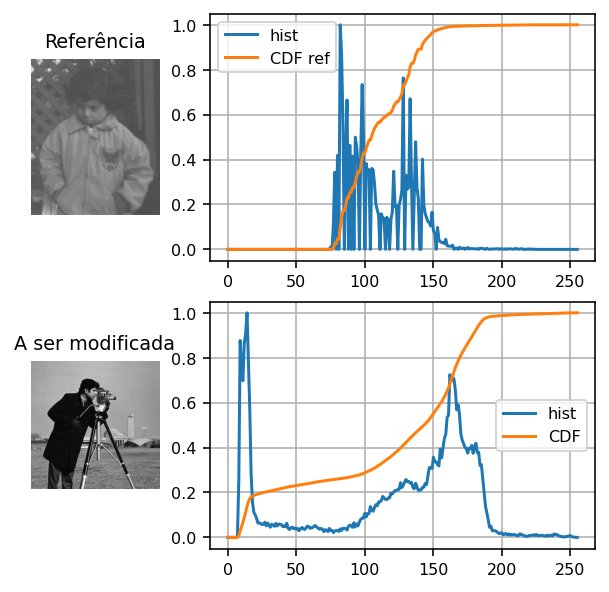

In [129]:
#plot dos resultados

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(4, 4),
                        gridspec_kw={'width_ratios':[1,3]},
                        constrained_layout=True); 
ax[0,0].imshow(ref_img, vmin=0, vmax=255, cmap='gray')
ax[0,0].set_title("Referência") 
ax[0,0].axis('off')
ax[0,1].plot(hist_centers_ref_img, hist_ref_img / hist_ref_img.max(),label='hist')
ax[0,1].plot(cdf_ref,label='CDF ref')
ax[0,1].grid()
ax[0,1].legend()

ax[1,0].imshow(img, vmin=0, vmax=255, cmap='gray')
ax[1,0].set_title("A ser modificada") 
ax[1,0].axis('off')
ax[1,1].plot(hist_centers_img, hist_img / hist_img.max(),label='hist')
ax[1,1].plot(cdf,label='CDF')
ax[1,1].grid()
ax[1,1].legend(); 

## 2.2 Registro de Histograma

In [130]:
M = np.zeros(shape=(2**8,1))# Guarda o mapemaneto. usei -1 porque o índice começa em 0!
M = img_as_ubyte(M)
data_info(M)
#print(M)


Classe: <class 'numpy.ndarray'>
Tipo de variável: uint8
Min, max: (0, 0)
Dimensões: (256, 1)


Calculando o mapeamento

In [131]:
#Calculando o mapemaento
#% ind is the position (in the histogram) for which the cdf2(i) is
    #% closest to the cdf1. Let's call this position cdf1(r).
    #%So, we want cdf2(i) to equal cdf1(r).
# Get the indices of minimum element in numpy array
"""result = numpy.where(arr == numpy.amin(arr))
print('Returned tuple of arrays :', result)
print('List of Indices of minimum element :', result[0])
Returned result  : (array([0, 8], dtype=int32),)
List of Indices of minimum element : [0 8]"""

intervalo = np.arange(0,2**8-1)
for i in intervalo:
    dif = abs(cdf[i] - cdf_ref)
    Min = np.where(dif == np.amin(dif))
    aux = Min[0]
    aux2 = aux[0]
    M[i]  = aux2 #aux2 stá recebdno o índice no qual dif é mínimo
    #print(aux2)

Aplicando o mapeamento

In [132]:
#aplicando o mapemanto à segunda imagem

#%// Now apply the mapping to the second image
m = img.shape[0]
n = img.shape[1]
Out = np.zeros(shape=(m,n))
Out = img_as_ubyte(Out)

for j in np.arange(0,m):
    for k in np.arange(0,n):
        aux3 = img[j,k]
        Out[j,k] = M[aux3]

In [133]:
#Cálculo dos histogramas

hist_ref_img, hist_centers_ref_img = histogram(ref_img,source_range='dtype')
#cdf_ref, bins_ref                  = exposure.cumulative_distribution(ref_img)
hist_img, hist_centers_img         = histogram(Out,source_range='dtype')
#cdf, bins                          = exposure.cumulative_distribution(img)

data_info(hist_ref_img)
data_info(hist_img)

Classe: <class 'numpy.ndarray'>
Tipo de variável: int64
Min, max: (0, 3628)
Dimensões: (256,)
Classe: <class 'numpy.ndarray'>
Tipo de variável: int64
Min, max: (0, 2985)
Dimensões: (256,)


In [134]:
#histogramas acuymulados
cdf_ref = hist_acu(hist_ref_img) / hist_ref_img.sum()
cdf     = hist_acu(hist_img) / hist_img.sum()
data_info(cdf_ref)
data_info(cdf)

Classe: <class 'numpy.ndarray'>
Tipo de variável: float64
Min, max: (0.0, 1.0)
Dimensões: (256,)
Classe: <class 'numpy.ndarray'>
Tipo de variável: float64
Min, max: (0.0, 1.0)
Dimensões: (256,)


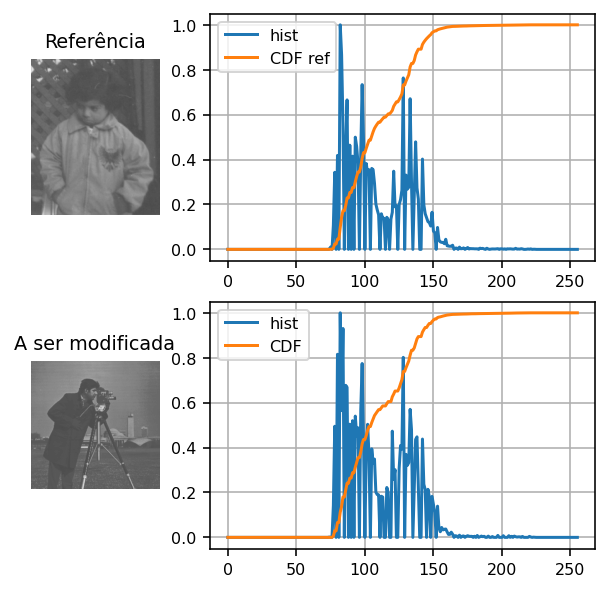

In [135]:
#plot dos resultados

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(4, 4),
                        gridspec_kw={'width_ratios':[1,3]},
                        constrained_layout=True); 
ax[0,0].imshow(ref_img, vmin=0, vmax=255, cmap='gray')
ax[0,0].set_title("Referência") 
ax[0,0].axis('off')
ax[0,1].plot(hist_centers_ref_img, hist_ref_img / hist_ref_img.max(),label='hist')
ax[0,1].plot(cdf_ref,label='CDF ref')
ax[0,1].grid()
ax[0,1].legend()

ax[1,0].imshow(Out, vmin=0, vmax=255, cmap='gray')
ax[1,0].set_title("A ser modificada") 
ax[1,0].axis('off')
ax[1,1].plot(hist_centers_img, hist_img / hist_img.max(),label='hist')
ax[1,1].plot(cdf,label='CDF')
ax[1,1].grid()
ax[1,1].legend(); 